<a href="https://colab.research.google.com/github/valenciajaime/GCoupling_v0/blob/master/Colab_Ejemplos/Electrodo_Tierra_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada

**Nombres:** 

German Moreno, Carlos Cardenas, Walter M. Villa, Hector D. Gomez, Jaime A. Valencia 


**Email:**

**Actividad:**

Proyecto Hidrocol 2022

**Fecha:**
rev. viernes 2022-nov-11


# Descripcion

**Objetivos:**

Programacion circuitos basicos de respuesta dinamica de sistemas de puesta a tierra.



Referencia modelo: 
On High-Frequency Circuit Equivalents of Vertical Ground Rod

###RESULTADOS AUN PENDIENTES####

[Drive Google paper](https://drive.google.com/file/d/1pxyyGNEAQbKFFtcB1o_Kf3rmV-OZZSnl/view?usp=sharing)



**Desarrollo:**



*   Circuito Fig1(c)
*   Circuito Fig1(d)
*   Circuito TL







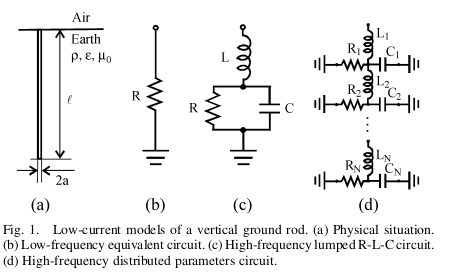

# Mododulos y funciones

Cargar Modulo_ET01.py [GDrive](https://drive.google.com/file/d/1MLLpcVQYNQylY-DohKhyoVND7laYPH-P/view?usp=sharing) en este colab para importarlo.

In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
from Modulo_ET01 import *  ##importacion de clases y funciones



# Lectura de datos

2. Cargar datos de tension y corriente tomados de una medida en un electrodo de puesta a tierra. Cargar los archivos I_hidroslta09k.adf, V_hidrosolta09k.adf, que son simulaciones de un electrodo de tierra en ATP y se capturan datos de corriente y voltaje en archivos. [Carpeta gdrive datos](https://drive.google.com/drive/folders/12xgQEgTx4hUDpoHK8XJLs5pJB5XgM1WN?usp=sharing)

Clase My_signal02 [Modulo_ET01.py](https://drive.google.com/file/d/1MLLpcVQYNQylY-DohKhyoVND7laYPH-P/view?usp=sharing) 


In [ ]:
#Lectura de datos de entrada en funcion del tiempo
V1 = My_signal02("V_hidrosolta09k.adf")
I1 = My_signal02("I_hidrosolta09k.adf")
# V_hidrosolta09k.adf #V_hidrosolta07.adf
# I_hidrosolta09k.adf #I_hidrosolta07.adf


Clase My_signal01
Clase My_signal01


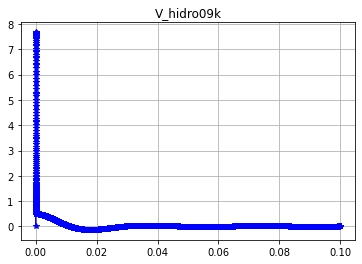

In [ ]:
V1.Show_Datos("V_hidro09k")

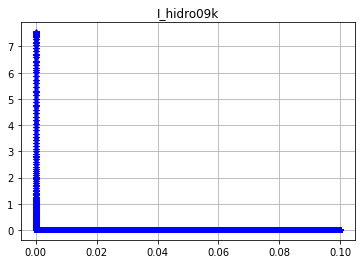

In [ ]:
I1.Show_Datos("I_hidro09k")

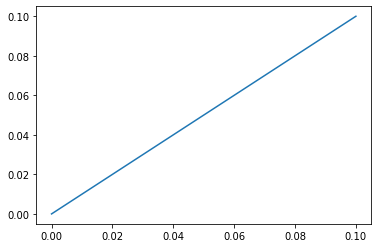

In [ ]:
Time = I1.Time ##se tienen iguales instantes de tiempo

plt.plot(I1.Time,V1.Time)
plt.show()

# tiempo >> Zw o Yw

Cargar los siguientes modulos:


Modulo [Mod_K_JMR_02](https://drive.google.com/file/d/1uga9_kM1c4M_kHvhKpTLVdwM8iD0TZ5g/view?usp=sharing) CON VARIAS FUNCIONES PARA CALCULO DE IMPEDANCIAS, ADMITANCIAS Y REPRESENTACION GRAFICA.

Una copia de este modulo esta en este enlace: [VECfit.py](https://drive.google.com/file/d/1Sph_C_C5MWYEAESO4PT2Kr5Ztx8TRNTg/view?usp=sharing)21k copia


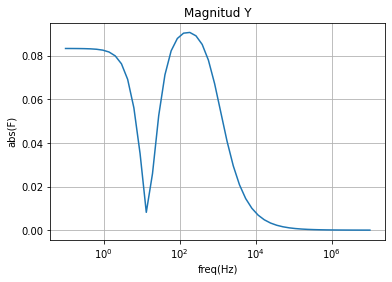

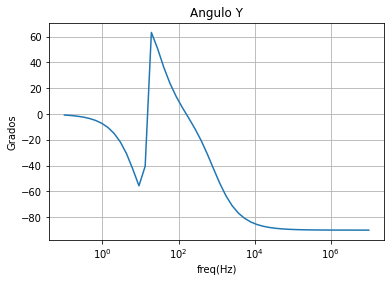

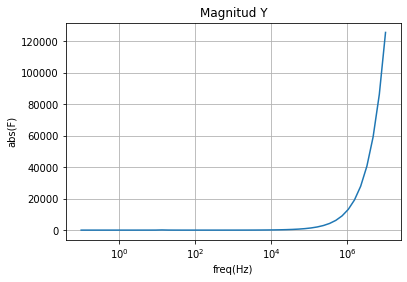

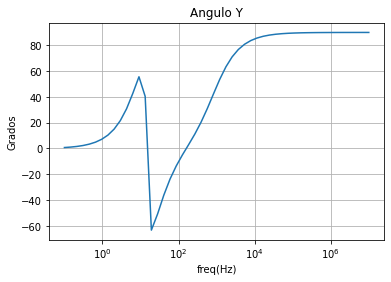

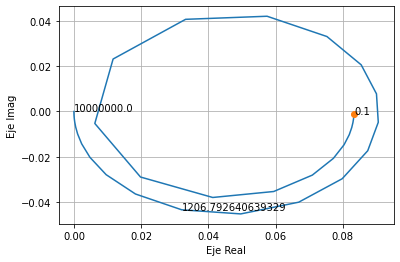

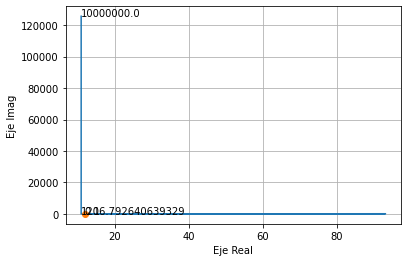

In [ ]:
##modulo de vector fitting y especial
#import VECTfit as vectfit
#import vectfit
from Mod_K_JMR_02 import *



In [ ]:
####funcion para obtener Impedancia y admitancia en
####funcion de la frecuencia a partir de datos en funcion del tiempo v(t), i(t)
#### DEBEN TENER IGUAL TIEMPO DE MUERTREO
# La funcion Get_Zw_YW01 de Mod_K_JMR_02 calcula fft Iw, Vw y luego Zw=Vw/IW  
# Yw = 1/Zw

ZZ, YY, SS, Hz = Get_Zw_YW01(Time, V1.Valores, I1.Valores)

In [ ]:
#'ImpedanciaYS: calculo,z1:10 ohms 2miliH
#                       z2:2 Ohmiso 250 miliH
#                       z3: 1 ohmio 500microF
# caso probado Impulso_02_Experimento2.acp

zc1,yc1 = ImpedanciaYS()
print("Z1: ",zc1)
print("Y1: ",yc1)
# ImpedanciaYS_01: calculo Z(s)= z1 serie(z2 paralelo z3)
#                  z={R: , L:, C: }formato de datos entrada
#                     Ohms, Henrios, Faradios    
z1 ={"R":0 , "L":2e-3 , "C":0} ##caso del circuito fig1 (c)
z2 ={"R":20 , "L":0 , "C":0}
z3 ={"R":0 , "L":0 , "C":500e-6}
zc2,yc2 = ImpedanciaYS_01(z1,z2,z3)
print("Z2: ",zc2)
print("Y2: ",yc2)



Z1:  (0.0005*s**3 + 2.756*s**2 + 536.0*s + 24000.0)/(0.25*s**2 + 3.0*s + 2000.0)
Y1:  (0.25*s**2 + 3.0*s + 2000.0)/(0.0005*s**3 + 2.756*s**2 + 536.0*s + 24000.0)
Z2:  (0.002*s*(20*s + 2000.0) + 40000.0)/(20*s + 2000.0)
Y2:  (20*s + 2000.0)/(0.002*s*(20*s + 2000.0) + 40000.0)


## Graficos Z(s), Y(s)

Grafico Bode Z


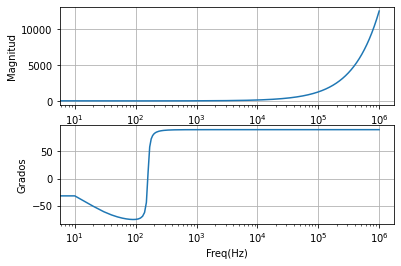

Grafico Bode Y


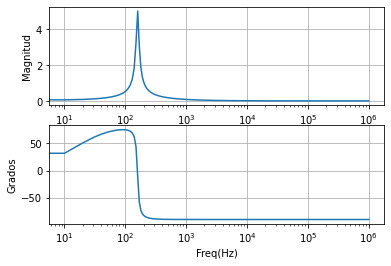

In [ ]:
#dada funcion simbolica en s, evaluarla en cualquier valor

FZ1_s = SP.lambdify(s,zc2)
ZC2 = FZ1_s(SS)
print("Grafico Bode Z")
Show_Z_01(ZC2,Hz)

FY1_s = SP.lambdify(s,yc2)
YC2 = FY1_s(SS)
print("Grafico Bode Y")
Show_Z_01(YC2,Hz)

# Impedancia Zw (lectura)

Grafico Bode Z


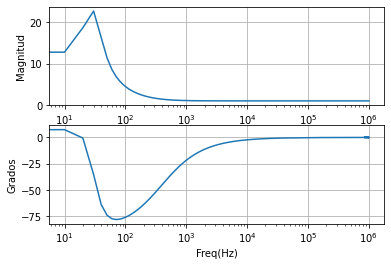

Grafico Bode Y


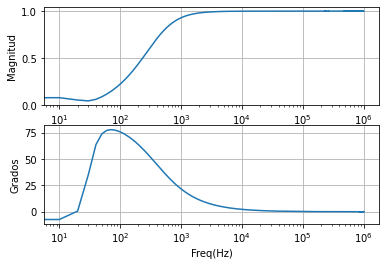

Grafico Nyquist Z


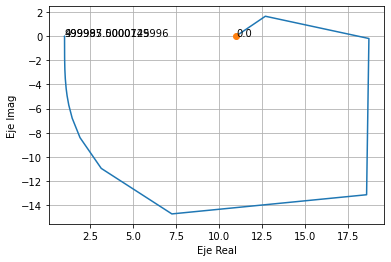

In [ ]:
print("Grafico Bode Z")
Show_Z_01(ZZ,Hz)
print("Grafico Bode Y")
Show_Z_01(YY,Hz)

print("Grafico Nyquist Z")
Show_NqZ_01(ZZ,Hz)

## Ajuste Vecfit

Se requiere modulo vectfit.py [Modulo](https://drive.google.com/file/d/1fn-I_rcDGu7MF-xXt_OI6PNL3ILLJIu3/view?usp=sharing)7k copia

[Rep_GH_Phild R](https://github.com/PhilReinhold/vectfit_python)7k original

[Rep_GH Artemi-Dimitriv](https://github.com/artemiy-dmitriev/vectfit)21k original

Una copia de este modulo esta en este enlace: [VECfit.py](https://drive.google.com/file/d/1Sph_C_C5MWYEAESO4PT2Kr5Ztx8TRNTg/view?usp=sharing)21k copia

Prueba con un polo y un residuo

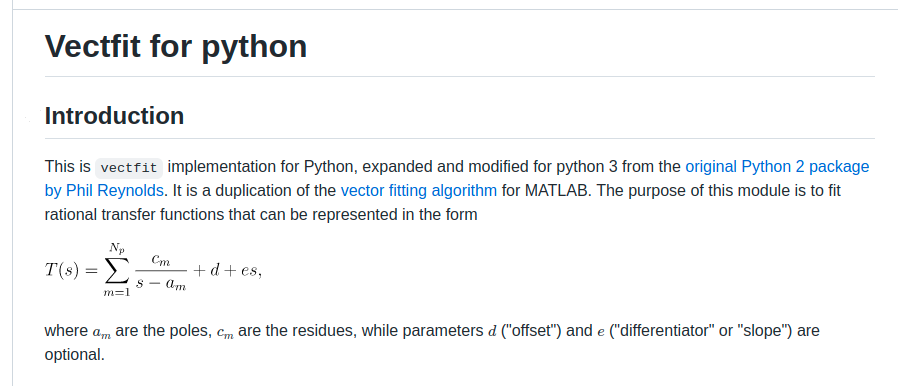

Caso con numero polos fijo <<<


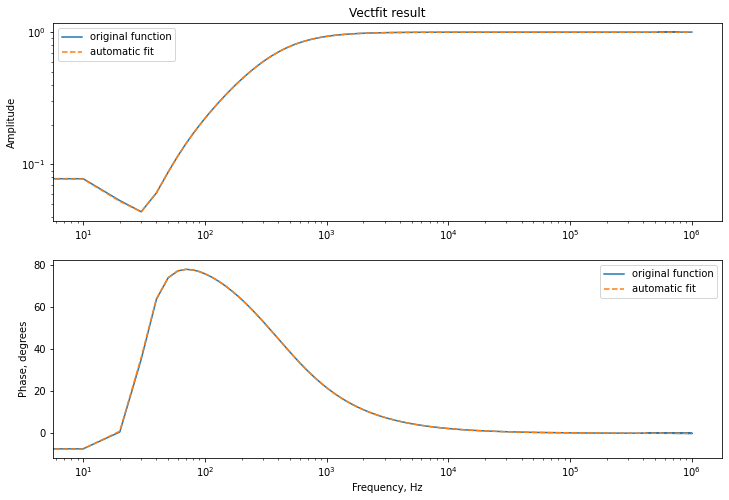

poles: [-5135.19564441+4.80684236e+06j -2479.22659399+1.84877790e+00j
  -211.90342078+5.01870894e+06j  -152.91533027-5.30044546e+00j
 -1524.08170064+3.80871139e+06j -9402.08737225+2.86427299e+06j]
residues: [ 4.78913100e-02-2.84255889j -2.51328252e+03-3.72778045j
 -7.67092894e-03-0.10750491j  1.60675420e+01+1.0182355j
  7.62934223e-02-0.31171313j  8.96135485e-01-1.94316689j]
offset: 1.0000647105158122
slope: 0


In [ ]:
##Caso de un polo
## SE DEBE CARGAR EL ARCHIVO vecfit.py que se obtiene modulo referenciado.

print("Caso con numero polos fijo <<<")
poles, residues, d, h = vectfit.vectfit_auto(YY, SS, allow_nonconj=True, \
                         n_complex_poles=4, \
                         n_real_poles=2, \
                        show=True)
print("""poles: {}
residues: {}
offset: {}
slope: {}""".format(poles, residues, d, h))

Caso con numero polos automatico <<<


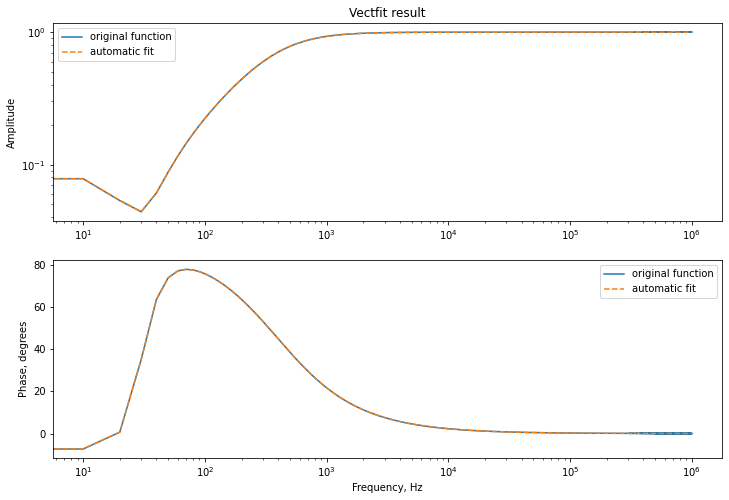

poles: [-2.19335548e+04-5101634.39289758j -2.19335548e+04+5101634.39289758j
 -1.64550410e+04-4515944.48390248j -1.64550410e+04+4515944.48390248j
 -2.48428720e+03      +0.j         -1.58559105e+02      +0.j
 -1.07365502e+02-3431872.91077723j -1.07365502e+02+3431872.91077723j
 -9.89241747e+01-2831188.0103221j  -9.89241747e+01+2831188.0103221j
 -5.48264684e+00-5681120.9663878j  -5.48264684e+00+5681120.9663878j
 -8.40413533e+02-3761873.33289904j -8.40413533e+02+3761873.33289904j
 -3.63940902e+04-2813710.64620587j -3.63940902e+04+2813710.64620587j
 -5.81436741e+04-4057679.47412136j -5.81436741e+04+4057679.47412136j
 -1.78526835e+05-3482207.7987556j  -1.78526835e+05+3482207.7987556j ]
residues: [ 4.01862282e+00+1.05653460e+01j  4.01862282e+00-1.05653460e+01j
  5.55209072e+00+6.91288721e+00j  5.55209072e+00-6.91288721e+00j
 -2.51579227e+03+0.00000000e+00j  1.64370901e+01+0.00000000e+00j
 -2.12164775e-02+6.08883615e-03j -2.12164775e-02-6.08883615e-03j
  2.83492304e-02-1.50401526e-02j  2.834923

In [ ]:
print("Caso con numero polos automatico <<<")
poles2, residues2, d2, h2 = vectfit.vectfit_auto(YY, SS,show=True)

print("""poles: {}
residues: {}
offset: {}
slope: {}""".format(poles2, residues2, d2, h2))


In [ ]:
#ajuste en frecuencia con vectorfitting
#YE2_ajuste = vectfit.model(SS, poles, residues, d, h)
YE2_ajuste = vectfit.model_polres(SS, poles, residues, d, h)
YE22_ajuste = vectfit.model_polres(SS, poles2, residues2, d2, h2)

Error_normaE:  0.09382595891245792
Error_normaE2(auto):  0.08621884907834675


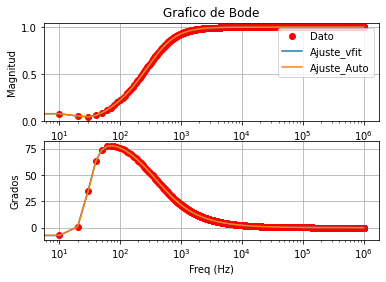

In [ ]:
##Graficos de bode DATOS PRUEBA
Error_norma = np.linalg.norm(YY- YE2_ajuste)
Error_norma2 = np.linalg.norm(YY- YE22_ajuste)
print("Error_normaE: ",Error_norma)
print("Error_normaE2(auto): ",Error_norma2)

plt.subplot(2,1,1)
plt.semilogx(Hz,np.abs(YY),"ro")
plt.semilogx(Hz,np.abs(YE2_ajuste))
plt.semilogx(Hz,np.abs(YE22_ajuste))
plt.legend(["Dato","Ajuste_vfit","Ajuste_Auto"])
plt.ylabel("Magnitud")
plt.title("Grafico de Bode")
plt.grid("on")

plt.subplot(2,1,2)
plt.semilogx(Hz,np.angle(YY, deg=True),"ro")
plt.semilogx(Hz,np.angle(YE2_ajuste, deg=True))
plt.semilogx(Hz,np.angle(YE22_ajuste, deg=True))
plt.ylabel("Grados")
plt.xlabel("Freq (Hz)")
plt.grid("on")
plt.show()

## funcion de polinomios simbolicos

In [ ]:
vf1 = Get_Vf2Sym(poles,residues,d,h)
print("""vectfit
n_complex_poles=4,
n_real_poles=2: /n""",vf1)


vectfit
n_complex_poles=4,
n_real_poles=2:  ((1.00006471051581*s**6 + s**5*(16410.431116299 - 16499607.7715383*I) + s**4*(-100605568624010.0 - 212258811535.989*I) + s**3*(-9.09144095024742e+17 + 2.68185685914886e+20*I) + s**2*(2.63190469816288e+26 + 1.29785764093896e+24*I) + s*(3.55536008471837e+28 + 3.75325074924908e+26*I) + 9.1260339148113e+30 + 4.28631863320146e+29*I)/(1.0*s**6 + s**5*(18905.4100623327 - 16498532.2285189*I) + s**4*(-100598908223612.0 - 253429023675.795*I) + s**3*(-1.16022404408399e+18 + 2.68167263380897e+20*I) + s**2*(2.63170081559198e+26 + 1.967308756527e+24*I) + s*(6.92701603574207e+29 + 4.33037655552981e+27*I) + 9.97584887223021e+31 + 3.8622076207369e+30*I), 1.00006471051581*s**6 + 16410.431116299*s**5 - 16499607.7715383*I*s**5 - 100605568624010.0*s**4 - 212258811535.989*I*s**4 - 9.09144095024742e+17*s**3 + 2.68185685914886e+20*I*s**3 + 2.63190469816288e+26*s**2 + 1.29785764093896e+24*I*s**2 + 3.55536008471837e+28*s + 3.75325074924908e+26*I*s + 9.1260339148113e+3

In [ ]:
vf2 = Get_Vf2Sym(poles2,residues2,d2,h2)
print("vf_automatico: ",vf2)


((1.00001787809897*s**20 + 625282.881789616*s**19 + s**18*(149309480935555.0 - 0.000488262045320244*I) + s**17*(8.46179020261732e+19 - 81922.0325928553*I) + s**16*(9.63290343911647e+27 - 50235939450.2875*I) + s**15*(4.85359487470646e+33 - 6.69675793541723e+18*I) + s**14*(3.52673178014663e+41 - 2.37944053768879e+24*I) + s**13*(1.5420880664939e+47 - 2.25801239913873e+32*I) + s**12*(8.07987462091294e+54 - 6.80627885318204e+37*I) + s**11*(2.97014201240161e+60 - 4.41871601541164e+45*I) + s**10*(1.2020256360512e+68 - 1.19002958983529e+51*I) + s**9*(3.55323877864049e+73 - 5.54117932561815e+58*I) + s**8*(1.16182748613044e+81 - 1.21992529269605e+64*I) + s**7*(2.57989939624411e+86 - 4.26853256775367e+71*I) + s**6*(7.0389509484559e+93 - 6.88740813107707e+76*I) + s**5*(1.04012106230889e+99 - 1.74740989553036e+84*I) + s**4*(2.42666995015162e+106 - 1.90477150014683e+89*I) + s**3*(1.78488852709311e+111 - 2.74707204728014e+96*I) + s**2*(3.6287757007076e+118 - 1.89413725644659e+101*I) + s*(5.2123450831

## Representacion en Zeros, Polos y Ganancia

In [ ]:
Zeros, Polos, Kg = vectfit.polres_to_zpk(poles,residues,d,h)
print("Zeros: ",Zeros)
print("Polos: ",Polos)
print("Gain: ",Kg)

Zeros:  [-9402.98175224+2.86427493e+06j -5135.24205717+4.80684521e+06j
 -1524.15778513+3.80871170e+06j  -211.8956973 +5.01870905e+06j
   -71.61331611+1.73225159e+02j   -63.4786496 -1.73968305e+02j]
Polos:  [-5135.19564441+4.80684236e+06j -2479.22659399+1.84877790e+00j
  -211.90342078+5.01870894e+06j  -152.91533027-5.30044546e+00j
 -1524.08170064+3.80871139e+06j -9402.08737225+2.86427299e+06j]
Gain:  (1.0000647105158122+0j)


# Metodo obtencion Rama  KIZILCAY (ATP)

# Obtencion Kisilcay = N(s)/D(s)

In [ ]:
import sympy as SP

s = SP.symbols("s")
nr = len(poles)

St = 0
for q in range(nr):
  si = residues[q]/(s - poles[q])
  St = St + si
St = St + (d + h*s)

print(St)

1.00006471051581 + (0.89613548532426 - 1.94316689470563*I)/(s + 9402.08737224524 - 2864272.98508627*I) + (0.0478913100267852 - 2.84255888956921*I)/(s + 5135.19564441033 - 4806842.36449773*I) + (-2513.28251617124 - 3.72778045430558*I)/(s + 2479.22659398825 - 1.84877789764456*I) + (0.0762934223041742 - 0.31171313364542*I)/(s + 1524.08170063777 - 3808711.3867674*I) + (-0.00767092894137785 - 0.107504905704585*I)/(s + 211.903420777273 - 5018708.94383502*I) + (16.0675420120828 + 1.01823550063381*I)/(s + 152.915330273833 + 5.30044546121623*I)


In [ ]:
R_k = SP.factor(SP.simplify(St))
R_k

(1.00006471051581*s**6 + s**5*(16410.431116299 - 16499607.7715383*I) + s**4*(-100605568624010.0 - 212258811535.989*I) + s**3*(-9.09144095024742e+17 + 2.68185685914886e+20*I) + s**2*(2.63190469816288e+26 + 1.29785764093896e+24*I) + s*(3.55536008471837e+28 + 3.75325074924908e+26*I) + 9.1260339148113e+30 + 4.28631863320146e+29*I)/(1.0*s**6 + s**5*(18905.4100623327 - 16498532.2285189*I) + s**4*(-100598908223612.0 - 253429023675.795*I) + s**3*(-1.16022404408399e+18 + 2.68167263380897e+20*I) + s**2*(2.63170081559198e+26 + 1.967308756527e+24*I) + s*(6.92701603574207e+29 + 4.33037655552981e+27*I) + 9.97584887223021e+31 + 3.8622076207369e+30*I)

In [ ]:
print("Numerador: ")
SP.numer(R_k)


Numerador: 


1.00006471051581*s**6 + s**5*(16410.431116299 - 16499607.7715383*I) + s**4*(-100605568624010.0 - 212258811535.989*I) + s**3*(-9.09144095024742e+17 + 2.68185685914886e+20*I) + s**2*(2.63190469816288e+26 + 1.29785764093896e+24*I) + s*(3.55536008471837e+28 + 3.75325074924908e+26*I) + 9.1260339148113e+30 + 4.28631863320146e+29*I

In [ ]:
print("Denominador; ")
SP.denom(R_k).expand()

Denominador; 


1.0*s**6 + 18905.4100623327*s**5 - 16498532.2285189*I*s**5 - 100598908223612.0*s**4 - 253429023675.795*I*s**4 - 1.16022404408399e+18*s**3 + 2.68167263380897e+20*I*s**3 + 2.63170081559198e+26*s**2 + 1.967308756527e+24*I*s**2 + 6.92701603574207e+29*s + 4.33037655552981e+27*I*s + 9.97584887223021e+31 + 3.8622076207369e+30*I

# Modelo en ATP

# Resultados y conclusiones

**Resultados y analisis:**


**Conclusiones:**


**Referencias:**